In [27]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import Common_Functions as cf 
from tensorflow import keras
from tensorflow.keras import layers 
from tensorflow.keras import models 
import os
from keras.regularizers import l2


import matplotlib
matplotlib.rcParamsDefault

os.environ['CUDA_VISIBLE_DEVICES'] = '0'
#import chirallag as cL
cf.reset()
matplotlib.rcParams.update({'legend.fontsize': 16})
matplotlib.rcParams.update({'font.size': 16})


Memory Reset


2022-01-10 18:14:48.944480: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-10 18:14:48.944884: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-10 18:14:48.945155: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-10 18:14:48.945400: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-10 18:14:48.945591: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

In [2]:
df_pions = np.array(pd.read_csv('/home/sean/Documents/Work/Level 4/Level-4-Masters-Project/testing_data.csv',header = None))
train_x, train_y = df_pions[:-10000,:-1], (-df_pions[:-10000,-1])
val_x, val_y = df_pions[-10000:,:-1], (-df_pions[-10000:,-1])

In [11]:
opt = keras.optimizers.Adam(amsgrad= True)
epoch_num = 100

In [12]:
def validation_grad(network_num):
    grad_loss = []
    grad_val = []
    model = models.Sequential()
    model.add(layers.Dense(64,activation= 'relu',input_shape = (train_x.shape[1],),kernel_initializer= 'he_normal'))
    model.add(layers.Dense(64,activation= 'relu',kernel_initializer= 'he_normal'))
    model.add(layers.Dense(1))
    model.compile(optimizer = opt,loss = 'mape', metrics = [['mean_absolute_error'],['mean_absolute_percentage_error']])
    for i in range(network_num):
        model.fit(train_x,train_y,validation_data=(val_x,val_y),batch_size= 256 , epochs = epoch_num)
        loss = np.array(model.history.history['loss'])
        val = np.array(model.history.history['val_mean_absolute_percentage_error'])
        grad_loss.append(np.gradient(loss))
        grad_val.append(np.gradient(val))

    return grad_loss, grad_val


In [14]:
grad_loss , grad_val = validation_grad(5)

Epoch 1/100
352/352 [==============================] - 2s 4ms/step - loss: 63.4909 - mean_absolute_error: 0.0736 - mean_absolute_percentage_error: 63.4909 - val_loss: 42.8397 - val_mean_absolute_error: 0.0484 - val_mean_absolute_percentage_error: 42.8397
Epoch 2/100
352/352 [==============================] - 1s 4ms/step - loss: 33.2755 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 33.2755 - val_loss: 27.6295 - val_mean_absolute_error: 0.0354 - val_mean_absolute_percentage_error: 27.6295
Epoch 3/100
352/352 [==============================] - 1s 4ms/step - loss: 25.0576 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 25.0576 - val_loss: 21.4737 - val_mean_absolute_error: 0.0271 - val_mean_absolute_percentage_error: 21.4737
Epoch 4/100
352/352 [==============================] - 1s 2ms/step - loss: 21.9718 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 21.9718 - val_loss: 19.6563 - val_mean_absolute_error: 0.0244 - val_mean_absolute_percen

In [30]:
np.savetxt('loss_derviative.csv',grad_loss,delimiter= ',')
np.savetxt('validation_derivative.csv',grad_val,delimiter= ',')


In [20]:
mean_grad_loss = np.mean(grad_loss, axis = 0 )
mean_grad_val = np.mean(grad_val, axis = 0 )

In [29]:
model.history

NameError: name 'model' is not defined

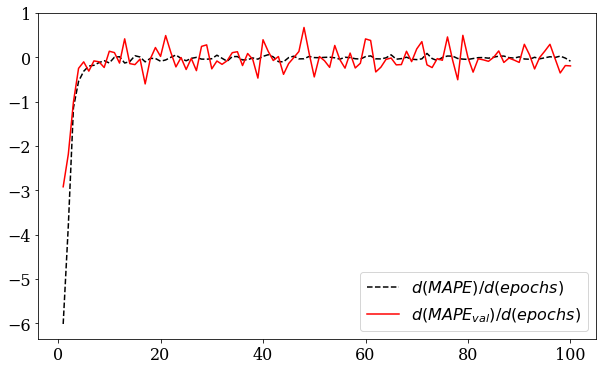

In [28]:
epochs = np.arange(1,epoch_num+1)
fig , ax = plt.subplots(1,1, figsize = (10,6))
ax.plot(epochs,mean_grad_loss,c = 'black',linestyle = '--', label = '$d(MAPE)/d(epochs)$')
ax.plot(epochs,mean_grad_val,c = 'red', linestyle = '-', label = '$d(MAPE_{val})/d(epochs)$')
ax.legend()